['Dataset']
['Red soil', 'Black Soil', 'Clay soil', 'Alluvial soil']
['Red soil', 'Black Soil', 'Clay soil', 'Alluvial soil']
Found 974 images belonging to 4 classes.
Found 241 images belonging to 4 classes.
Found 340 images belonging to 4 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,468 (9.24 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.3119 - loss: 1.9858 - val_accuracy: 0.4232 - val_loss: 1.3147
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.4245 - loss: 1.4620 - val_accuracy: 0.4938 - val_loss: 1.1740
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.4852 - loss: 1.2863 - val_accuracy: 0.5353 - val_loss: 1.0316
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.5349 - loss: 1.1351 - val_accuracy: 0.5519 - val_loss: 0.9798
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.6058 - loss: 0.9941 - val_accuracy: 0.5436 - val_loss: 0.9477
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.6471 - loss: 0.9202 - val_accuracy: 0.6017 - val_loss: 0.9268
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.6770 - loss: 0.8655 - val_accuracy: 0.5809 - val_loss: 0.9132
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.6933 - loss: 0.8199 - val_accuracy: 0.6307 - val_loss:

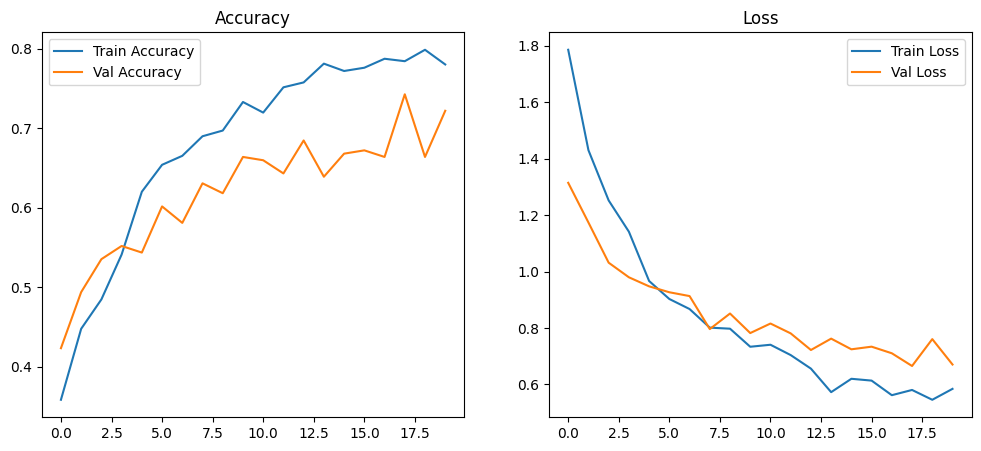

11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.6304 - loss: 0.8421
✅ Test Accuracy: 75.29%


In [ ]:

from google.colab import files
import zipfile
import os

# Upload de ton fichier zip
#uploaded = files.upload()

# Décompression
#with zipfile.ZipFile("archive_4.zip", 'r') as zip_ref:
    #zip_ref.extractall("Dataset")

# Vérification des dossiers
#print(os.listdir("Dataset"))
#print(os.listdir("Dataset/Dataset/Train"))
#print(os.listdir("Dataset/Dataset/test"))

print(os.listdir("/content/Dataset"))
print(os.listdir("/content/Dataset/Dataset/Train"))
print(os.listdir("/content/Dataset/Dataset/test"))


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


train_dir = "/content/Dataset/Dataset/Train"
test_dir = "/content/Dataset/Dataset/test"

img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224,224,3))
base_model.trainable = False  # on gèle les poids du modèle pré-entraîné

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(train_generator.num_classes, activation="softmax")
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

# -------------------------------
# 5. Entraînement
# -------------------------------
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)

# -------------------------------
# 6. Visualisation des résultats
# -------------------------------
plt.figure(figsize=(12,5))

# Courbes d'accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.legend()
plt.title("Accuracy")

# Courbes de perte
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()

# -------------------------------
# 7. Évaluation sur test set
# -------------------------------
test_loss, test_acc = model.evaluate(test_generator)
print(f"✅ Test Accuracy: {test_acc*100:.2f}%")


###Deuxieme essaye


Saving archive_4.zip to archive_4.zip
['Dataset']
['Red soil', 'Black Soil', 'Clay soil', 'Alluvial soil']
['Red soil', 'Black Soil', 'Clay soil', 'Alluvial soil']
Found 974 images belonging to 4 classes.
Found 241 images belonging to 4 classes.
Found 340 images belonging to 4 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,468 (9.24 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.3439 - loss: 1.6715 - val_accuracy: 0.4523 - val_loss: 1.2332
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.4627 - loss: 1.3692 - val_accuracy: 0.5394 - val_loss: 1.0497
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.5280 - loss: 1.1538 - val_accuracy: 0.5768 - val_loss: 0.9453
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.5880 - loss: 0.9934 - val_accuracy: 0.5394 - val_loss: 0.9669
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 102s 3s/step - accuracy: 0.6297 - loss: 0.8925 - val_accuracy: 0.5602 - val_loss: 0.9080
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 0.6820 - loss: 0.8605 - val_accuracy: 0.5892 - val_loss: 0.8813
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.7013 - loss: 0.8413 - val_accuracy: 0.6224 - val_loss: 0.8092
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.7278 - loss: 0.7042 - val_accuracy: 0.6307 - val_loss

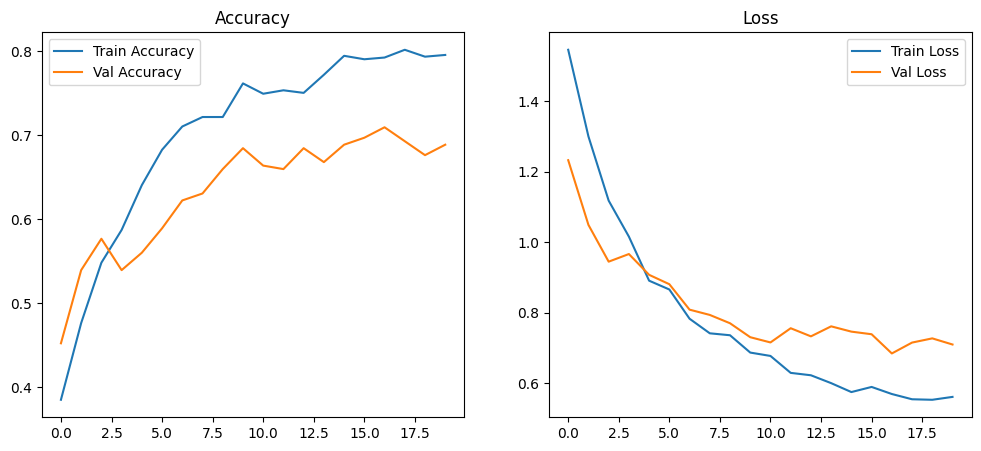

11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.6696 - loss: 0.8360
✅ Test Accuracy: 77.65%


NameError: name 'count_images' is not defined

In [3]:
# -------------------------------
# 1. Décompression du fichier ZIP
# -------------------------------
from google.colab import files
import zipfile
import os

# Upload de ton fichier zip
uploaded = files.upload()

# Décompression
with zipfile.ZipFile("archive_4.zip", 'r') as zip_ref:
    zip_ref.extractall("Dataset")

# Vérification des dossiers
print(os.listdir("Dataset"))
print(os.listdir("Dataset/Dataset/Train"))
print(os.listdir("Dataset/Dataset/test"))


# -------------------------------
# 2. Importation des librairies
# -------------------------------
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# -------------------------------
# 3. Préparation des données
# -------------------------------
train_dir = "Dataset/Dataset/Train"
test_dir = "Dataset/Dataset/test"

img_size = (224, 224)  # MobileNetV2 attend 224x224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

# -------------------------------
# 4. Construction du modèle
# -------------------------------
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224,224,3))
base_model.trainable = False  # on gèle les poids du modèle pré-entraîné

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(train_generator.num_classes, activation="softmax")
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

# -------------------------------
# 5. Entraînement
# -------------------------------
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)

# -------------------------------
# 6. Visualisation des résultats
# -------------------------------
plt.figure(figsize=(12,5))

# Courbes d'accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.legend()
plt.title("Accuracy")

# Courbes de perte
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()

# -------------------------------
# 7. Évaluation sur test set
# -------------------------------
test_loss, test_acc = model.evaluate(test_generator)
print(f"✅ Test Accuracy: {test_acc*100:.2f}%")


#################################################



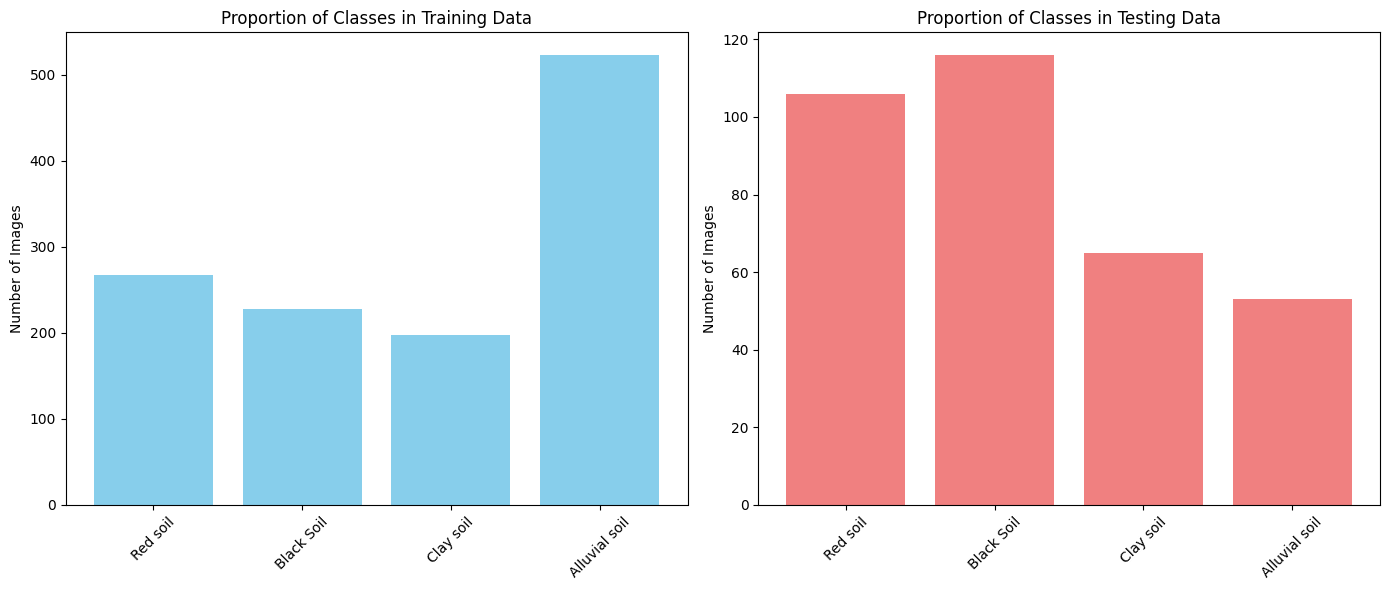

In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np

def count_images(directory):
    """Counts the number of images in each subdirectory of a given directory."""
    counts = {}
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        if os.path.isdir(subdir_path):
            counts[subdir] = len([name for name in os.listdir(subdir_path) if os.path.isfile(os.path.join(subdir_path, name))])
    return counts

# Define the directories
train_dir = "Dataset/Dataset/Train"
test_dir = "Dataset/Dataset/test"

# Count images in each directory
train_counts = count_images(train_dir)
test_counts = count_images(test_dir)

# Prepare data for plotting
train_labels = list(train_counts.keys())
train_values = list(train_counts.values())
test_labels = list(test_counts.keys())
test_values = list(test_counts.values())

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Training data plot
axes[0].bar(train_labels, train_values, color='skyblue')
axes[0].set_title('Proportion of Classes in Training Data')
axes[0].set_ylabel('Number of Images')
axes[0].tick_params(axis='x', rotation=45)

# Testing data plot
axes[1].bar(test_labels, test_values, color='lightcoral')
axes[1].set_title('Proportion of Classes in Testing Data')
axes[1].set_ylabel('Number of Images')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [5]:
# Calculate total number of images in training and testing sets
total_train_images = sum(train_counts.values())
total_test_images = sum(test_counts.values())

# Calculate proportion for each class in training set
train_proportions = {label: count / total_train_images for label, count in train_counts.items()}

# Calculate proportion for each class in testing set
test_proportions = {label: count / total_test_images for label, count in test_counts.items()}

print("Proportion of images in Training Data:")
for label, proportion in train_proportions.items():
    print(f"{label}: {proportion:.2f}")

print("\nProportion of images in Testing Data:")
for label, proportion in test_proportions.items():
    print(f"{label}: {proportion:.2f}")

Proportion of images in Training Data:
Red soil: 0.22
Black Soil: 0.19
Clay soil: 0.16
Alluvial soil: 0.43

Proportion of images in Testing Data:
Red soil: 0.31
Black Soil: 0.34
Clay soil: 0.19
Alluvial soil: 0.16


In [6]:
import pandas as pd

# Create data for the table
data = {'Train': train_counts, 'Test': test_counts}
df = pd.DataFrame(data)

# Display the table
print("Number of Images per Class:")
display(df)

Number of Images per Class:


,Train,Test
Red soil,267,106
Black Soil,228,116
Clay soil,197,65
Alluvial soil,523,53


##CNN simple

In [7]:
# Calculate the total number of images
total_images = total_train_images + total_test_images

print(f"Total number of images in the training set: {total_train_images}")
print(f"Total number of images in the testing set: {total_test_images}")
print(f"Total number of images used: {total_images}")

Total number of images in the training set: 1215
Total number of images in the testing set: 340
Total number of images used: 1555


##TRANFERT LEARNING
